In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.rcParams['figure.figsize'] = [20, 15]

In [14]:
data = pd.read_csv(r'Datasets (Kaggle)/AB_NYC_2019.csv')

In [15]:
np.shape(data)

(48895, 16)

In [44]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
potential_turnover                float64
potential_yearly_income           float64
neighbourhood_group_ID               int8
neighbourhood_ID                    int16
minimum_dollar_per_turnover         int64
dtype: object

In [17]:
data['potential_turnover'] = round(data['availability_365'] / data['minimum_nights'])

In [39]:
data['potential_yearly_income'] = (data['price'] * data['minimum_nights']) * data['potential_turnover']
data['minimum_dollar_per_turnover'] = data['price'] * data['minimum_nights']

In [42]:
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,potential_turnover,potential_yearly_income,neighbourhood_group_ID,neighbourhood_ID,minimum_dollar_per_turnover
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,9,2018-10-19,0.21,6,365,365.0,54385.0,1,108,149
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,45,2019-05-21,0.38,2,355,355.0,79875.0,2,127,225
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,...,0,NaN,NaN,1,365,122.0,54900.0,2,94,450
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,270,2019-07-05,4.64,1,194,194.0,17266.0,1,41,89
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,9,2018-11-19,0.10,1,0,0.0,0.0,2,61,800


In [20]:
data.groupby(['neighbourhood_group','room_type']).mean()['potential_yearly_income'].sort_values(ascending=False)

neighbourhood_group  room_type      
Staten Island        Entire home/apt    36456.482955
Manhattan            Entire home/apt    34323.104478
Queens               Entire home/apt    23102.722805
Bronx                Entire home/apt    22345.501319
Brooklyn             Entire home/apt    19902.605712
Manhattan            Private room       14668.688299
Staten Island        Private room       13833.420213
Bronx                Private room       11898.055215
                     Shared room        11131.200000
Manhattan            Shared room        10771.089583
Queens               Private room       10641.815540
                     Shared room        10578.949495
Brooklyn             Private room        8482.977793
                     Shared room         8262.803874
Staten Island        Shared room         6698.000000
Name: potential_yearly_income, dtype: float64

In [46]:
data.groupby(['room_type']).size().sort_values(ascending=False)

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
dtype: int64

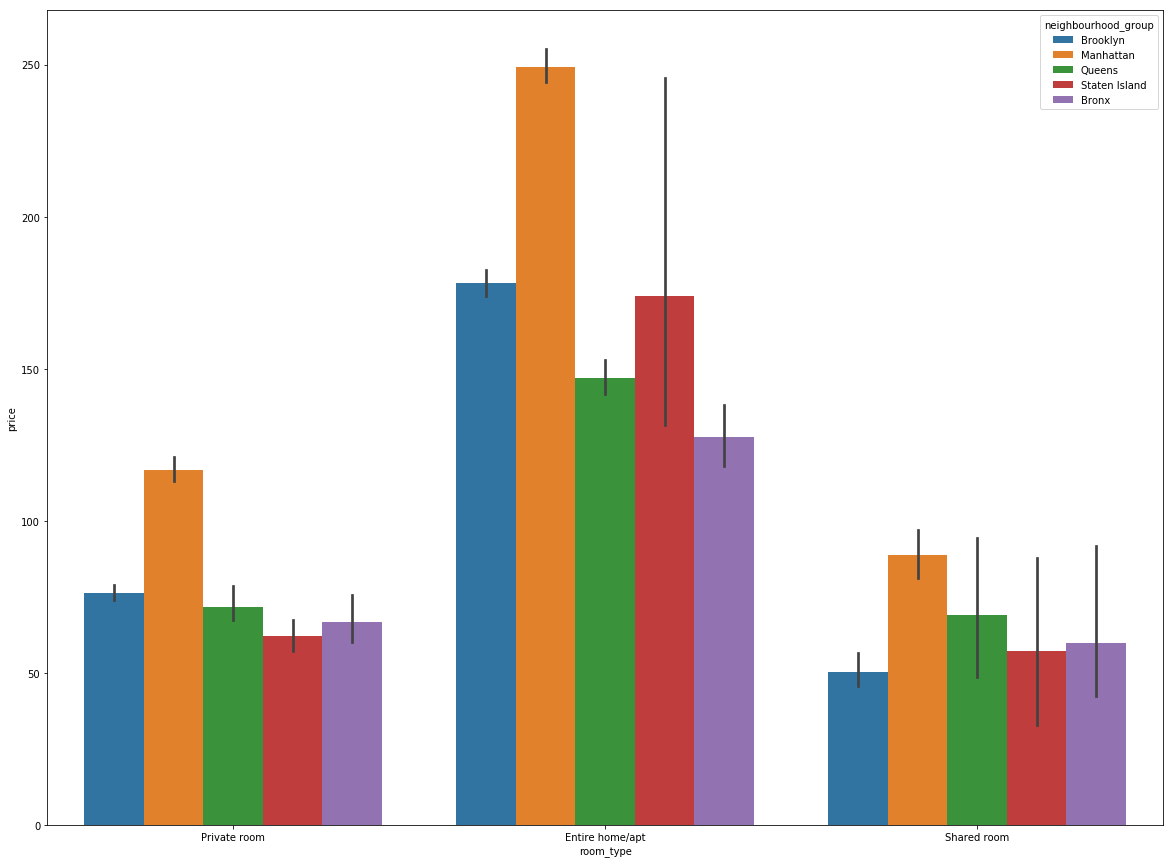

In [35]:
sns.barplot(x=data['room_type'], y=data['price'], hue=data['neighbourhood_group'])

In [23]:
data['neighbourhood_group_ID'] = data['neighbourhood_group'].astype('category').cat.codes
data['neighbourhood_ID'] = data['neighbourhood'].astype('category').cat.codes

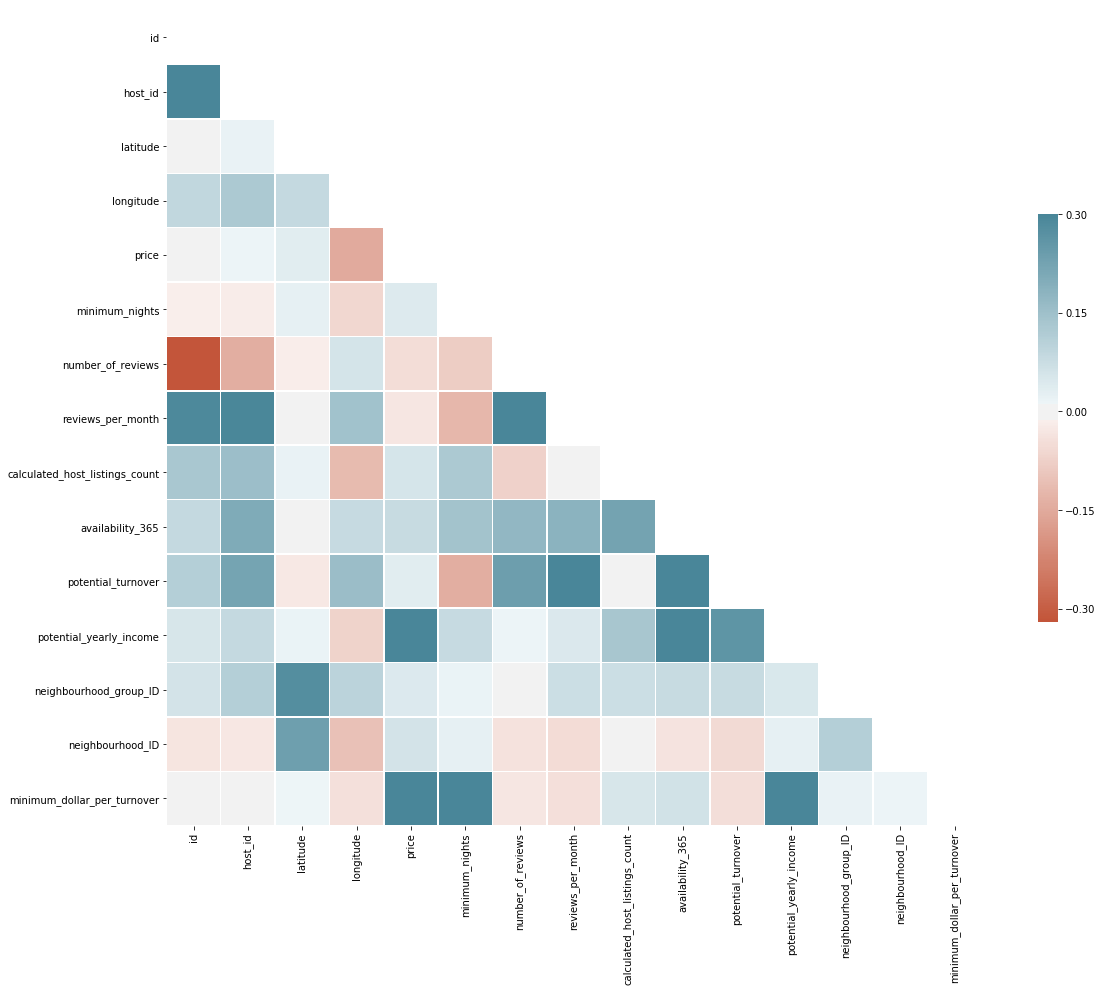

In [41]:
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


cmap = sns.diverging_palette(740, 220, as_cmap=True)


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

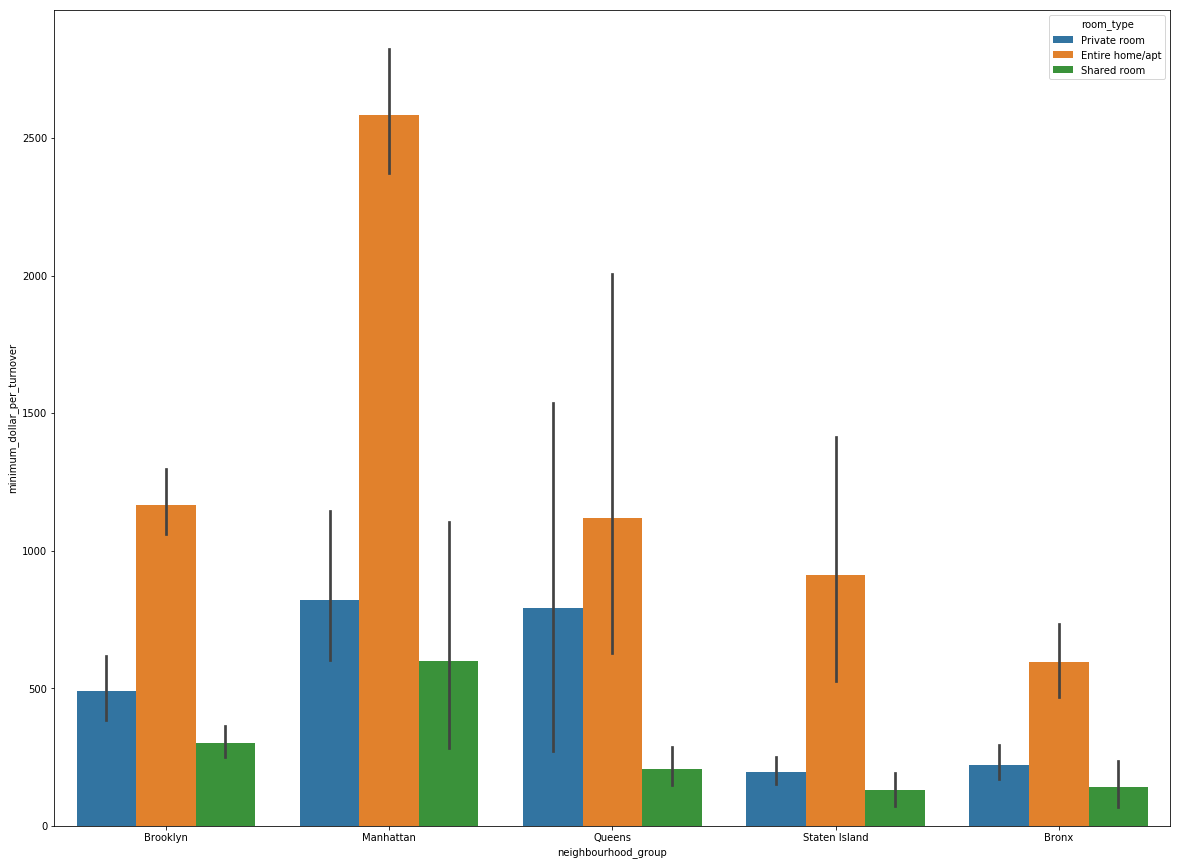

In [40]:
sns.barplot(x=data['neighbourhood_group'], y=data['minimum_dollar_per_turnover'], hue=data['room_type'])

In [28]:
from wordcloud import WordCloud, STOPWORDS

In [29]:
text = data.name.values

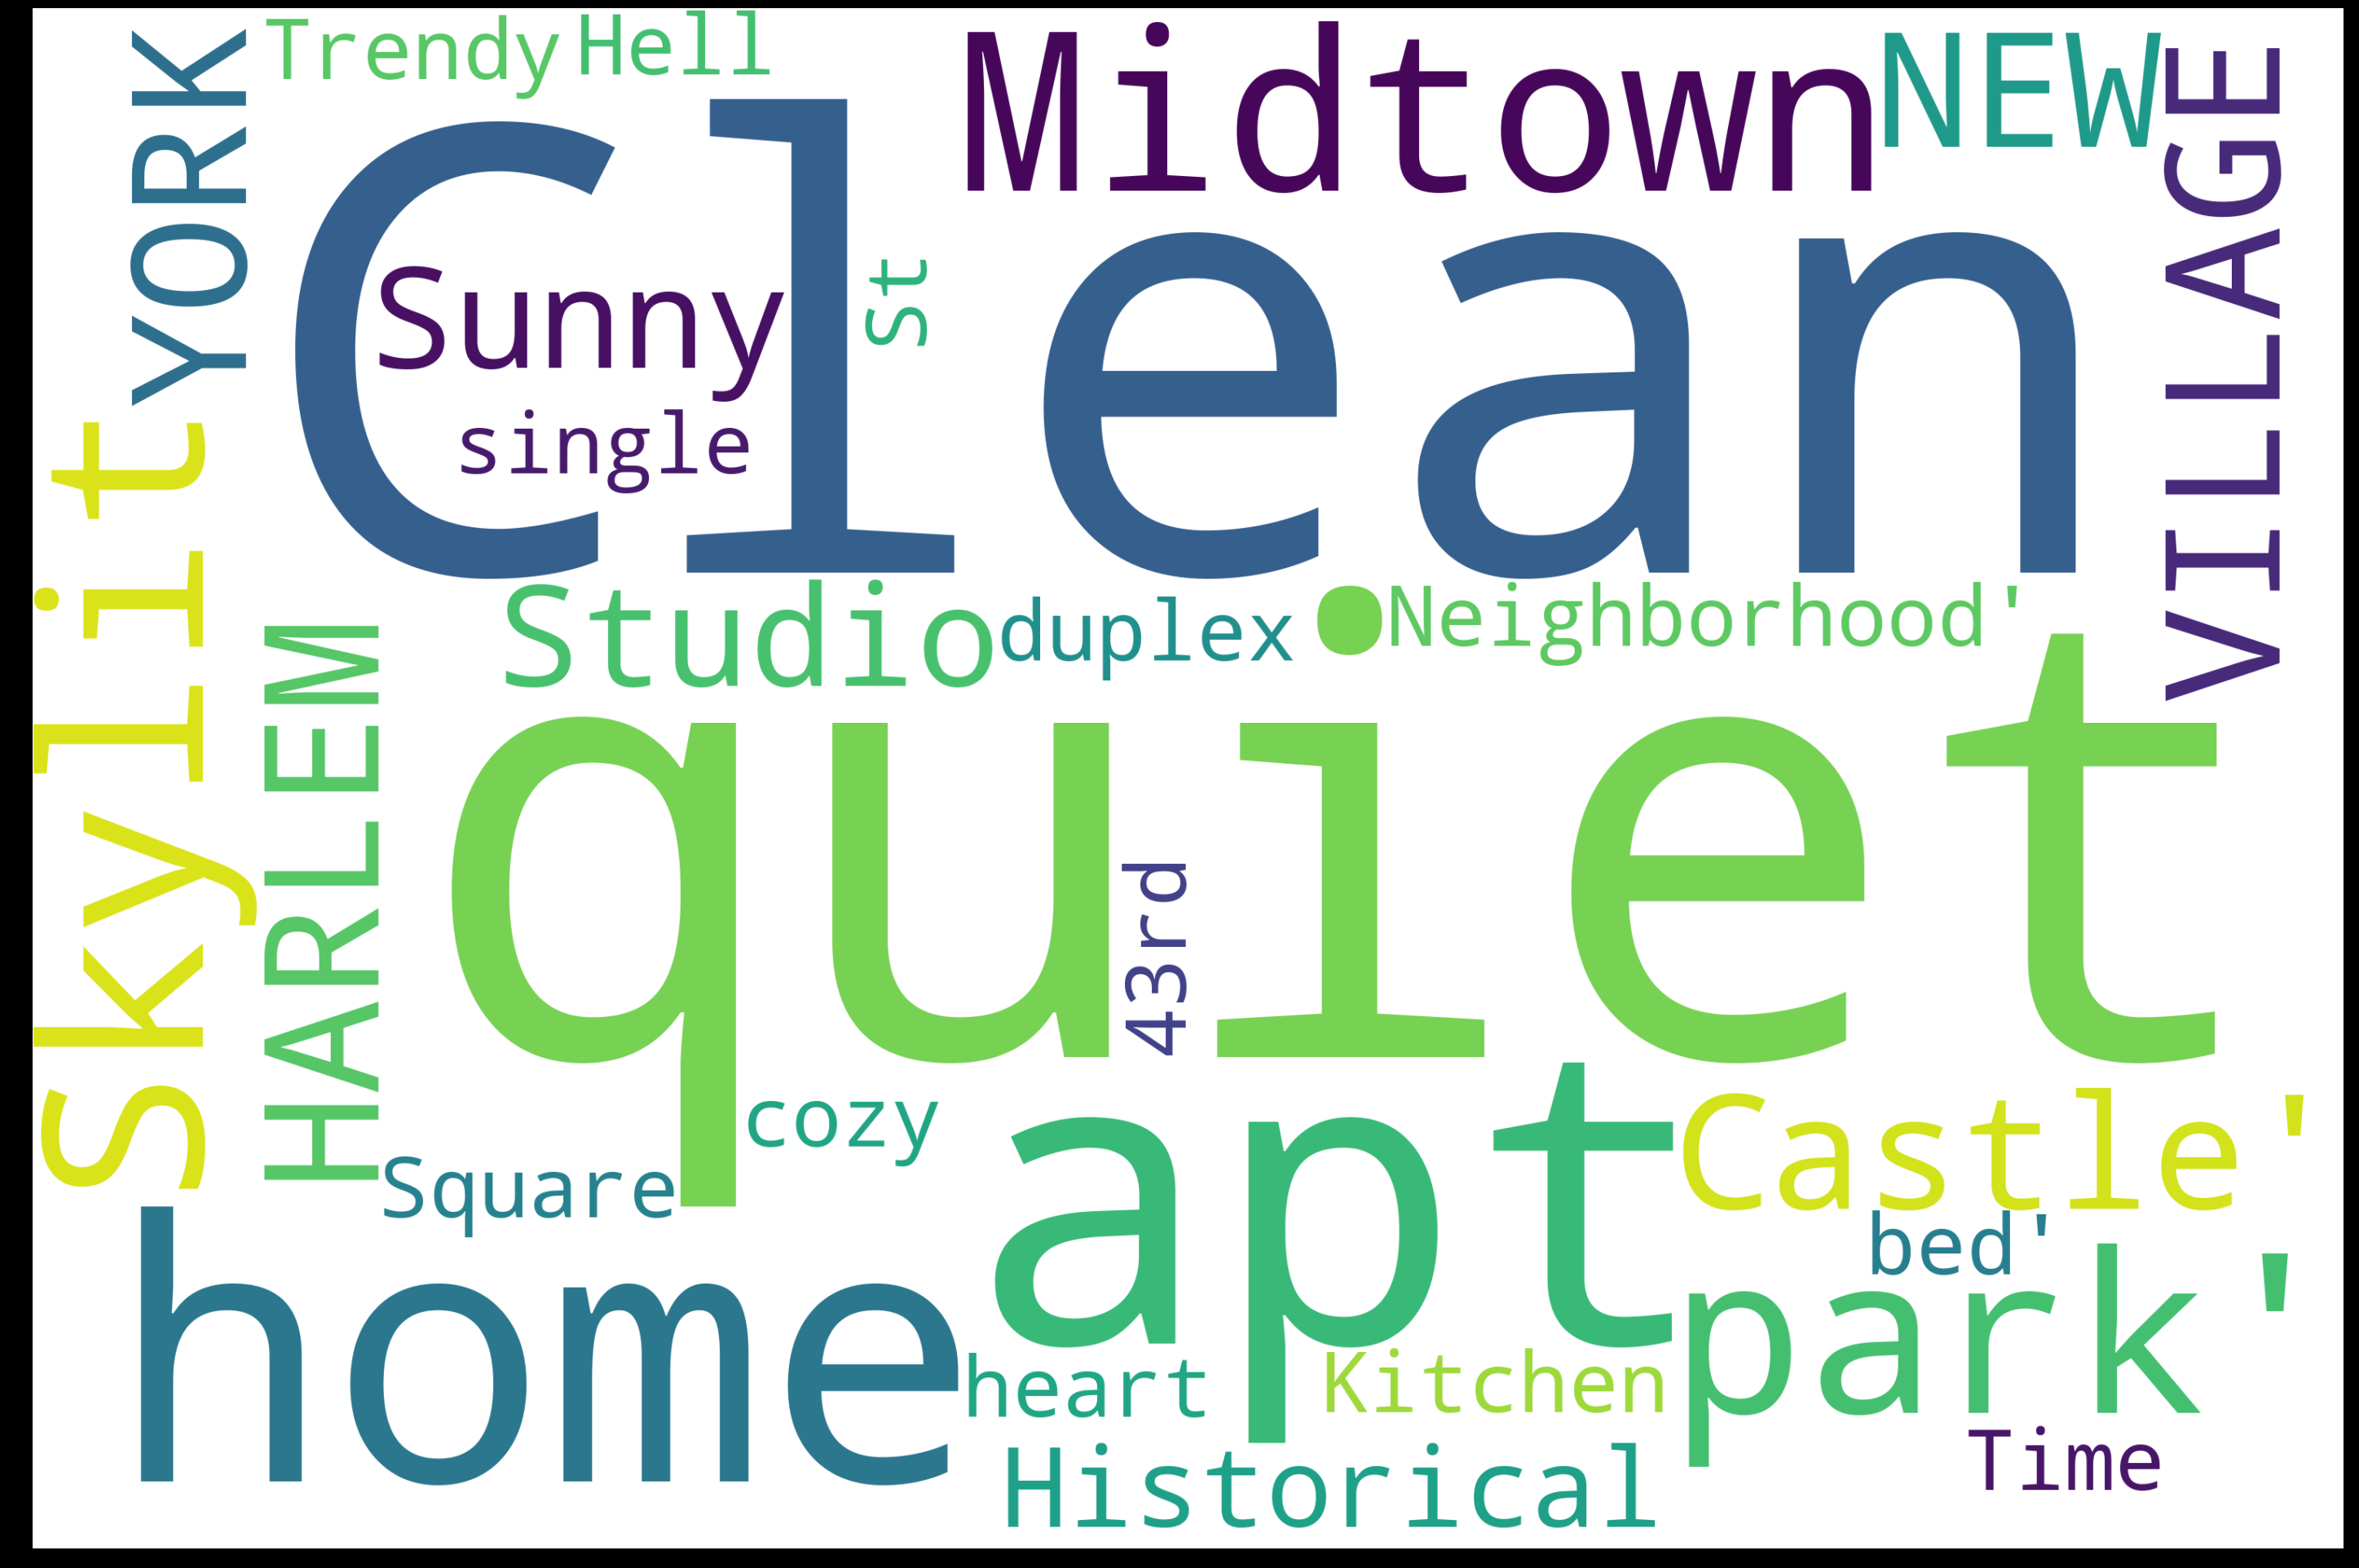

In [31]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()